In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("../data/Sample Student Data File.csv")
df.head(5)

,stu_id,stu_name,email,k1_energy,k2_energy,k3_tick1,k3_tick2,my_pref,concerns
0,20004488,"SAFFRON, Corgipoo",CorgipooSAF@connect.ust.hk,26,80,0,0,NaN,NaN
1,20023331,"HYSSOP, Chamois",ChamoisHYS@connect.ust.hk,27,85,0,0,NaN,NaN
2,20043679,"LEEKS, Beetle",BeetleLEE@connect.ust.hk,71,40,0,0,NaN,NaN
3,20067232,"CHRYSANTHEMUM, Abelisaurus",AbelisaurusCHR@connect.ust.hk,57,60,0,0,NaN,NaN
4,20076931,"CELERIAC, Aniu",AniuCEL@connect.ust.hk,54,80,0,0,NaN,NaN


Shape of your Data Set loaded: (100, 9)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
stu_id,100,int64,0,0.000000,100.000000,0,possible ID column: drop
stu_name,100,object,0,0.000000,100.000000,1,"combine rare categories, possible ID column: drop"
email,100,object,0,0.000000,100.000000,1,"combine rare categories, possible ID column: drop"
k1_energy,52,int64,0,0.000000,52.000000,0,
k2_energy,12,int64,0,0.000000,12.000000,0,
k3_tick1,2,int64,0,0.000000,2.000000,0,
k3_tick2,2,int64,0,0.000000,2.000000,0,
my_pref,0,float64,100,100.000000,0.000000,0,"fill missing, very high nulls percent: drop"
concerns,0,float64,100,100.000000,0.000000,0,"fill missing, very high nulls percent: drop"


    9 Predictors classified...
        5 variables removed since they were ID or low-information variables
        List of variables removed: ['stu_id', 'stu_name', 'email', 'my_pref', 'concerns']
Number of All Scatter Plots = 3


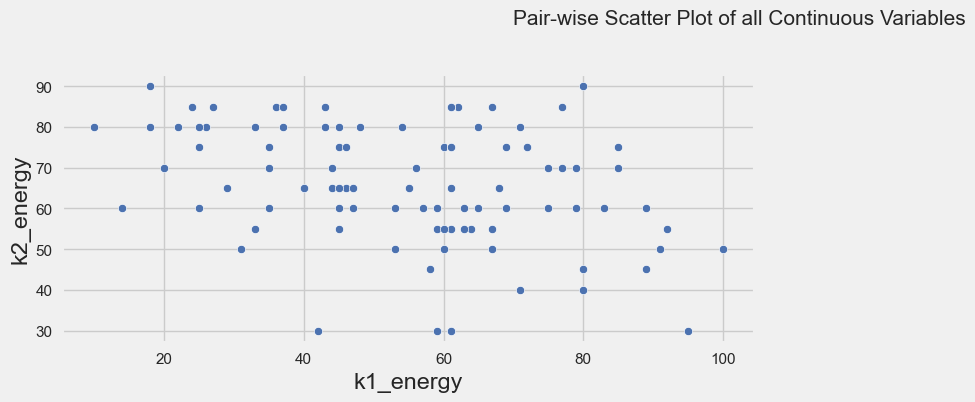

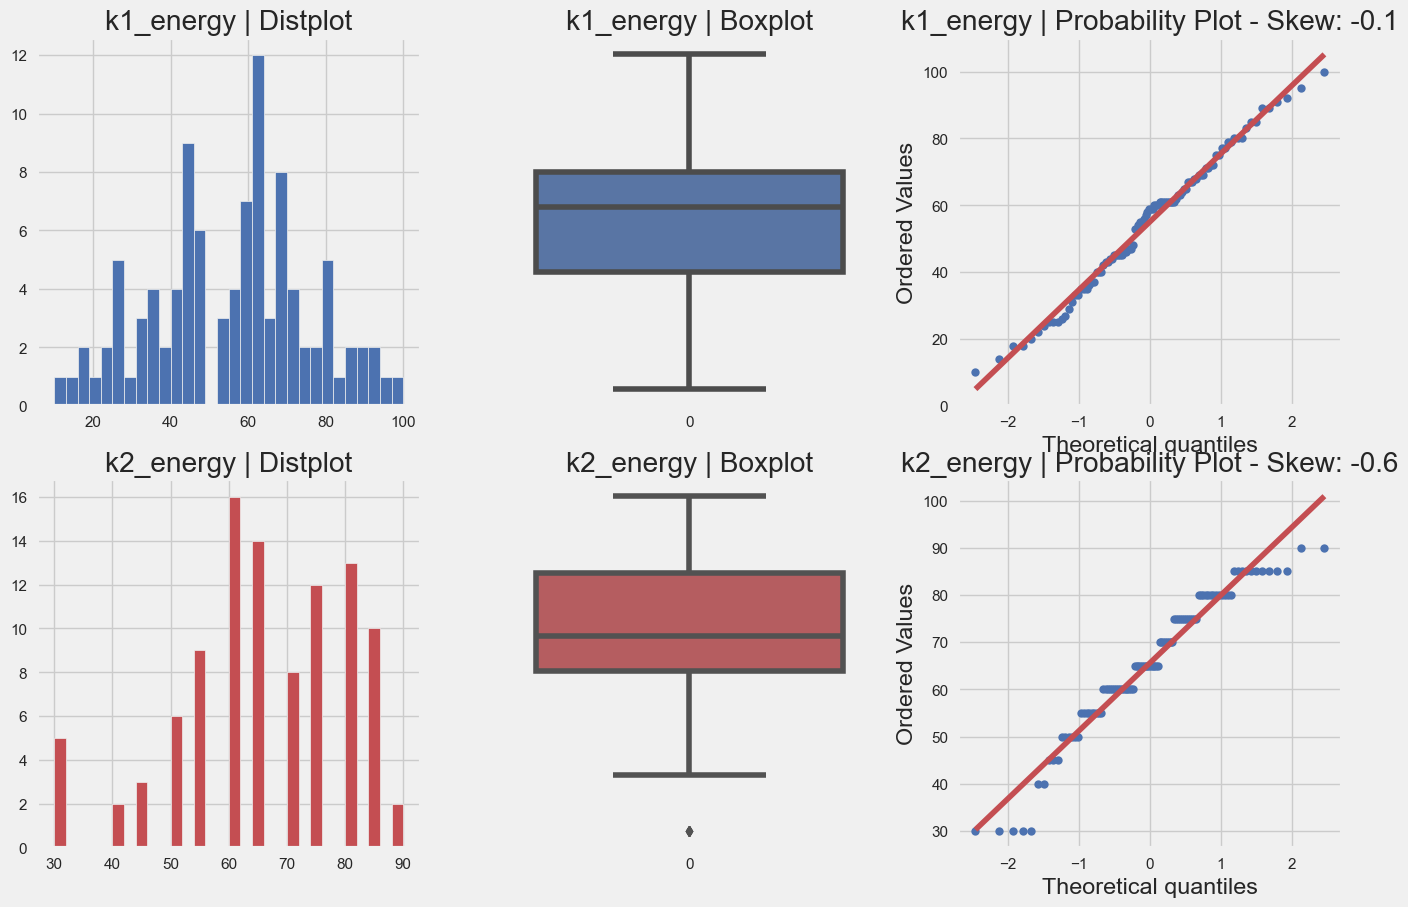

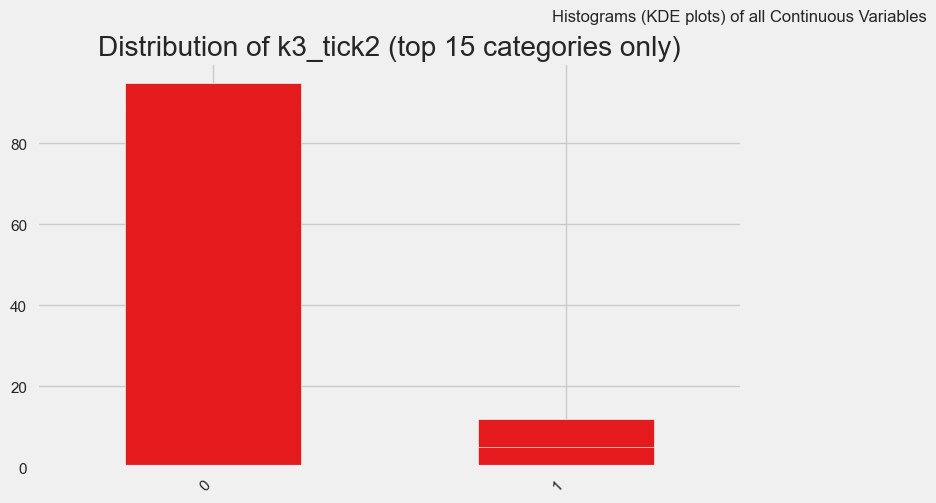

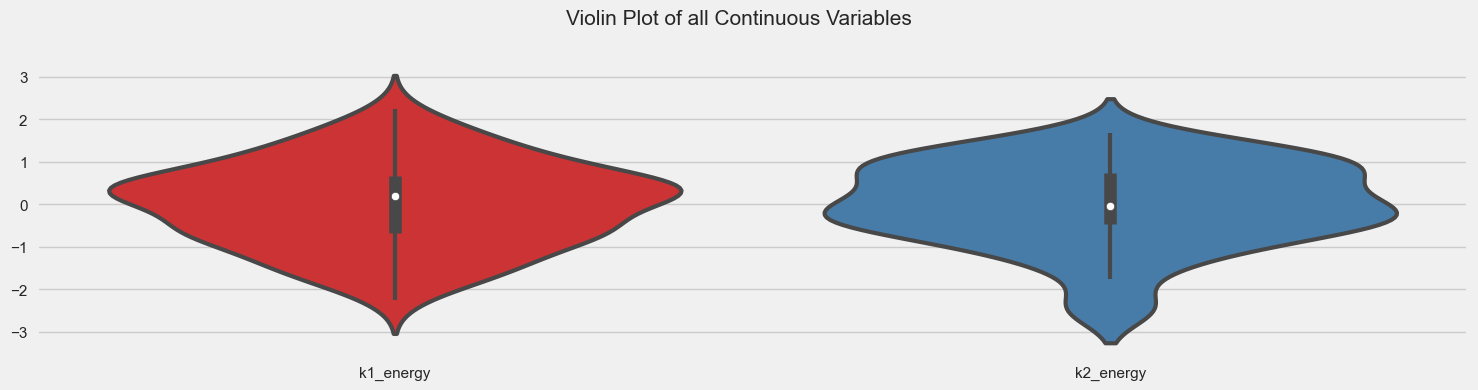

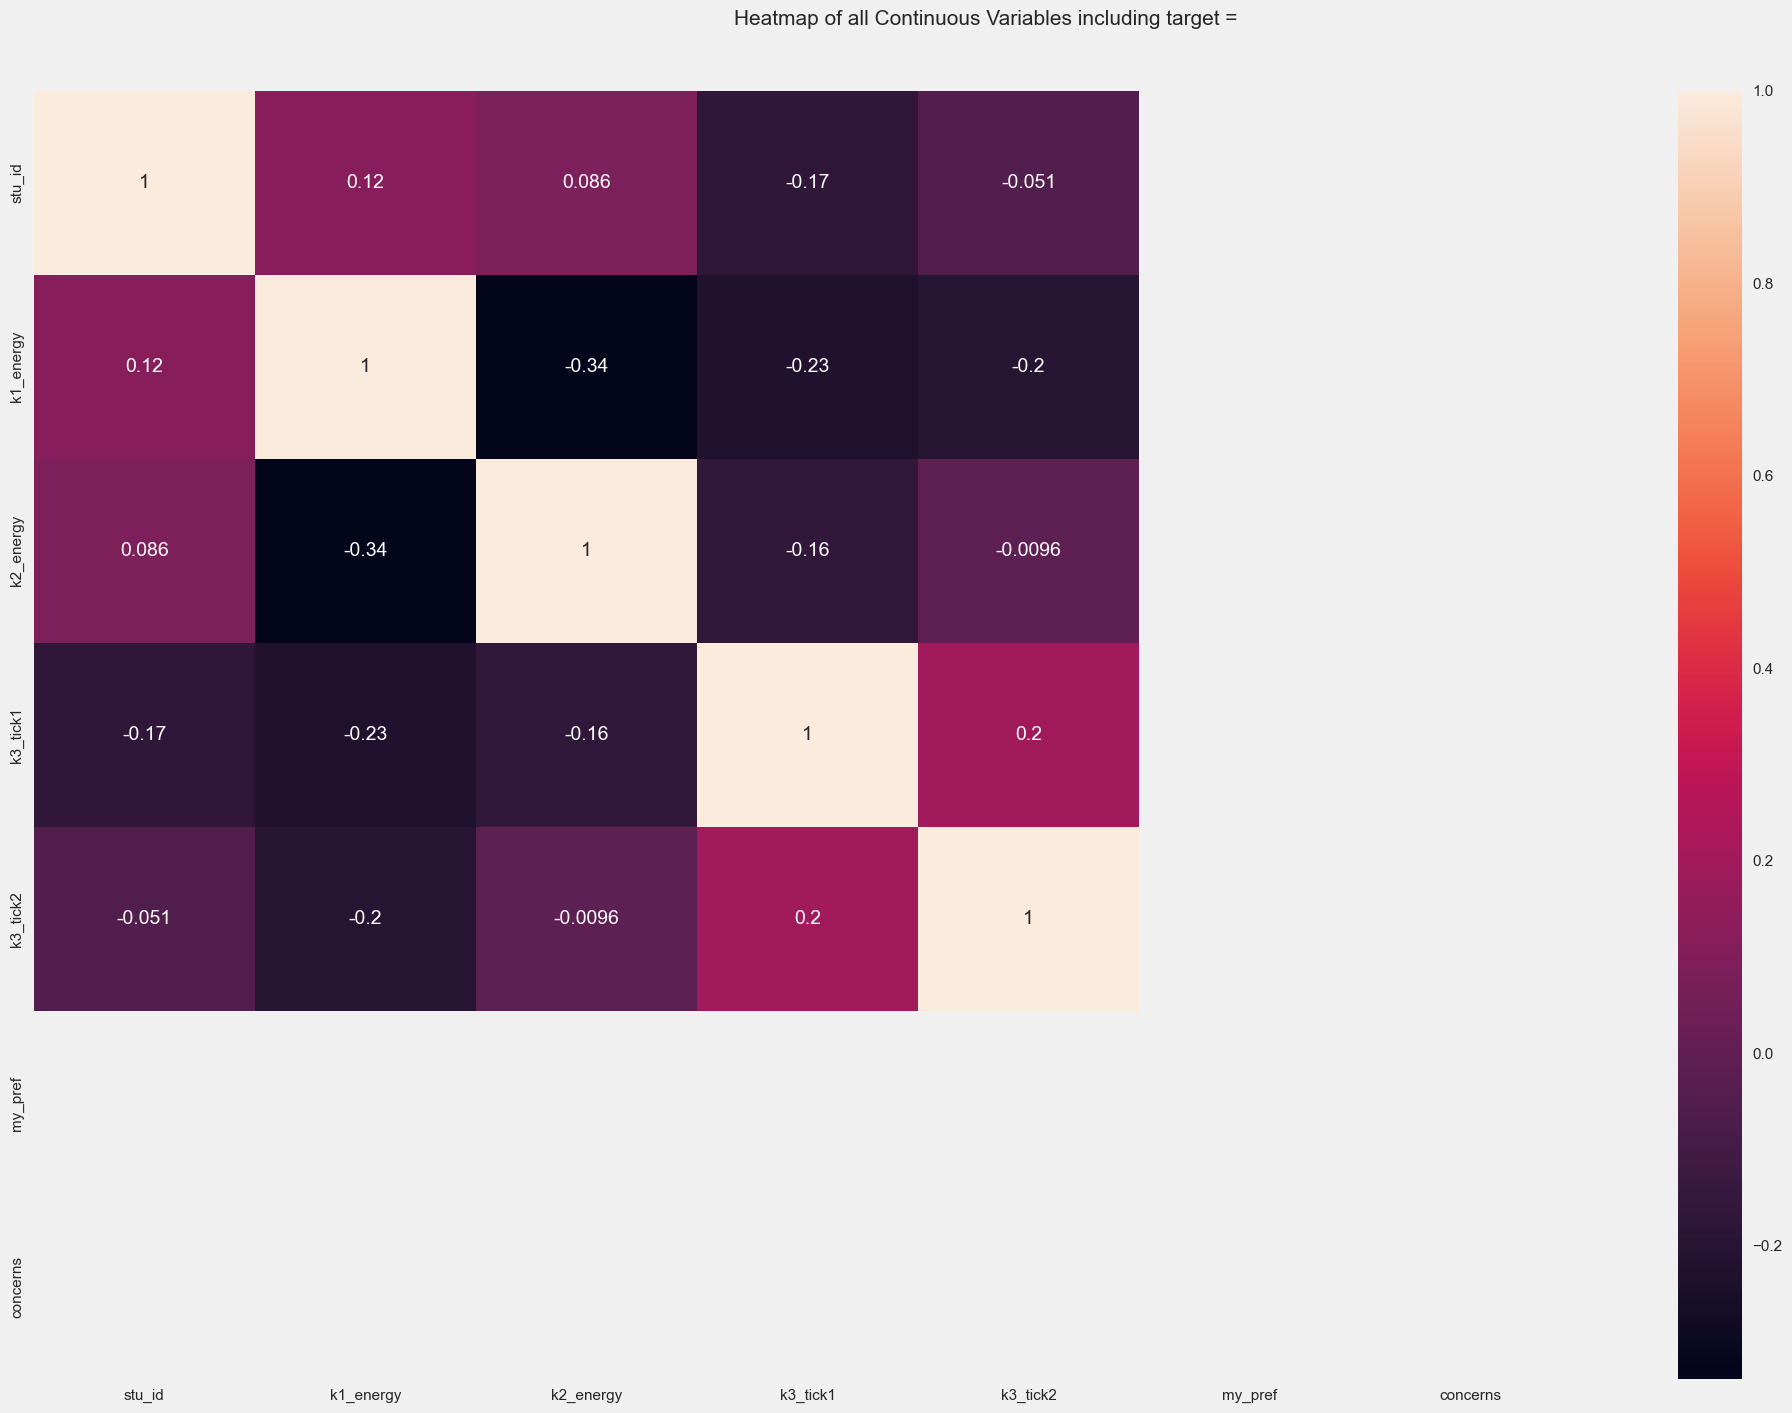

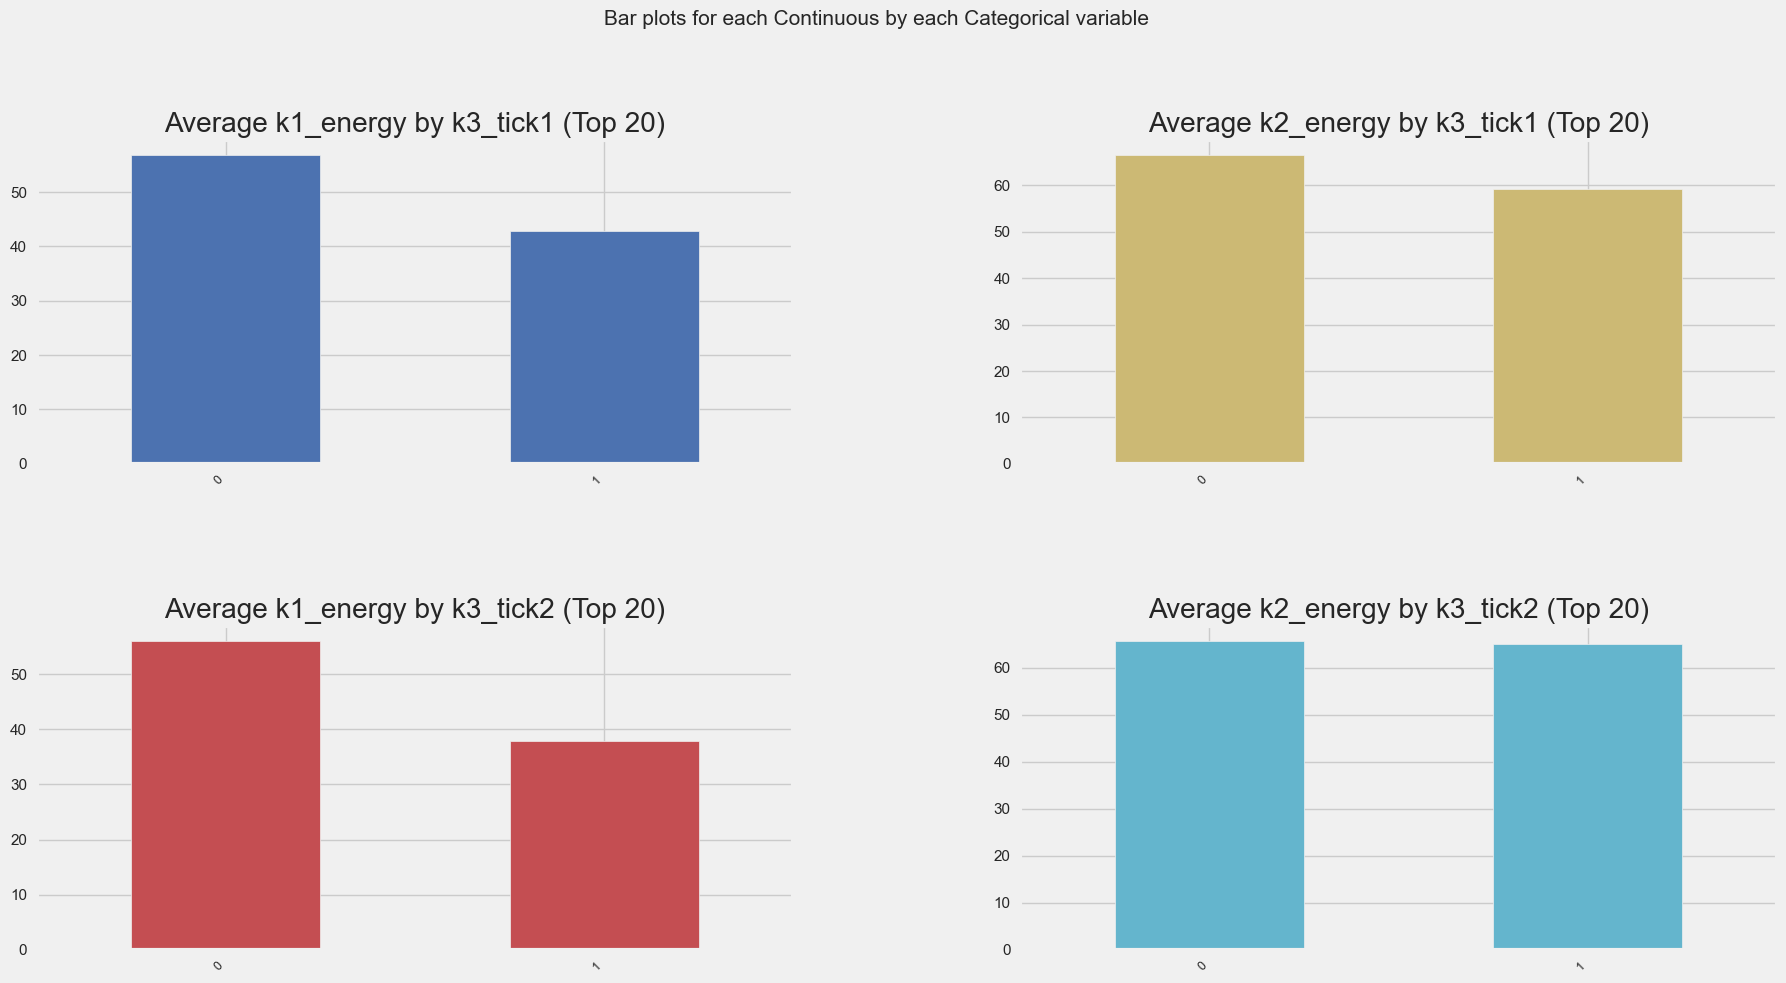

All Plots done
Time to run AutoViz = 3 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [13]:
# Use autoWiz to get a quick overview of the data
from autoviz.AutoViz_Class import AutoViz_Class

%matplotlib inline

AV = AutoViz_Class()
viz = AV.AutoViz("../data/Sample Student Data File.csv", sep=",")

In [15]:
df.head()

,stu_id,stu_name,email,k1_energy,k2_energy,k3_tick1,k3_tick2,my_pref,concerns
0,20004488,"SAFFRON, Corgipoo",CorgipooSAF@connect.ust.hk,26,80,0,0,NaN,NaN
1,20023331,"HYSSOP, Chamois",ChamoisHYS@connect.ust.hk,27,85,0,0,NaN,NaN
2,20043679,"LEEKS, Beetle",BeetleLEE@connect.ust.hk,71,40,0,0,NaN,NaN
3,20067232,"CHRYSANTHEMUM, Abelisaurus",AbelisaurusCHR@connect.ust.hk,57,60,0,0,NaN,NaN
4,20076931,"CELERIAC, Aniu",AniuCEL@connect.ust.hk,54,80,0,0,NaN,NaN


In [19]:
df_K1_Energy = df[['k1_energy']]
df_K1_Energy['k1_energy'].describe()


count    100.0000
mean      55.0700
std       20.1275
min       10.0000
25%       41.5000
50%       59.0000
75%       68.2500
max      100.0000
Name: k1_energy, dtype: float64

In [20]:
df_K2_Energy = df[['k2_energy']]
df_K2_Energy['k2_energy'].describe()

count    100.000000
mean      65.600000
std       14.482312
min       30.000000
25%       58.750000
50%       65.000000
75%       76.250000
max       90.000000
Name: k2_energy, dtype: float64

In [22]:
df_K3_Tick1 = df[['k3_tick1']]
df_K3_Tick1['k3_tick1'].value_counts()

0    88
1    12
Name: k3_tick1, dtype: int64

In [23]:
df_K3_Tick2 = df[['k3_tick2']]
df_K3_Tick2['k3_tick2'].value_counts()

0    95
1     5
Name: k3_tick2, dtype: int64

In [25]:
print("Amount of rows with k1_energy over average: ", len(df[df['k1_energy'] > df['k1_energy'].mean()]))

Amount of rows with k1_energy over average:  54


In [61]:
def add_remaining_student(df, students_df, teams):
    min_diff = 100000
    min_diff_index = 0
    for index, row in students_df.iterrows():
        k1_energy_avg = (sum(student['k1_energy'] for student in teams[0]) + row['k1_energy']) / (len(teams[0]) + 1)
        k2_energy_avg = (sum(student['k2_energy'] for student in teams[0]) + row['k2_energy']) / (len(teams[0]) + 1)
        diff = abs(k1_energy_avg - df['k1_energy'].mean()) + abs(k2_energy_avg - df['k2_energy'].mean())
        if diff < min_diff:
            min_diff = diff
            min_diff_index = index

    teams[0].append(students_df.loc[min_diff_index])

    return teams

# Algorithm 1

Difference between the min and max k1_energy_avg:  12.583333333333336
Difference between the min and max k2_energy_avg:  18.33333333333333


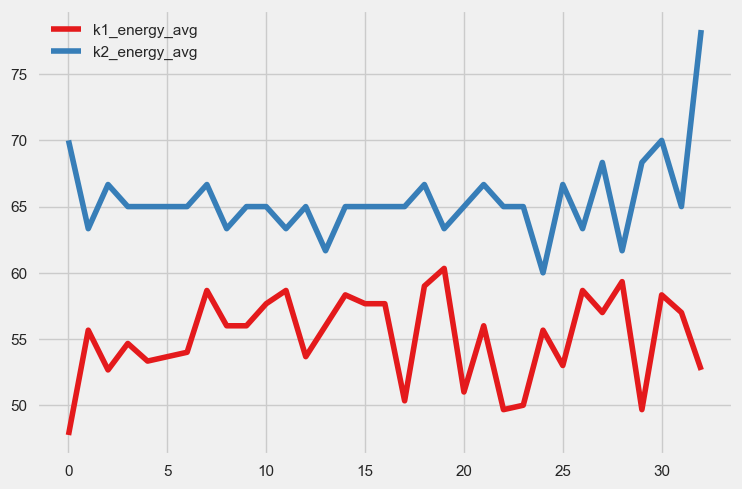

In [64]:

students_df = df.copy()
# students_df.sort_values(by=['k1_energy'], inplace=True, ascending=False)

teams = [[] for _ in range(33)]

for team in teams:
    for index, row in students_df.iterrows():
        if row['k1_energy'] >= df['k1_energy'].mean():
            team.append(row)
            students_df.drop(index, inplace=True)
            break

for team in teams:
    while len(team) < 3:
        min_diff = 100000
        min_diff_index = 0
        for index, row in students_df.iterrows():
            k1_energy_avg = (sum(student['k1_energy'] for student in team) + row['k1_energy']) / (len(team) + 1)
            k2_energy_avg = (sum(student['k2_energy'] for student in team) + row['k2_energy']) / (len(team) + 1)
            diff = abs(k1_energy_avg - df['k1_energy'].mean()) + abs(k2_energy_avg - df['k2_energy'].mean())
            if diff < min_diff:
                min_diff = diff
                min_diff_index = index
        team.append(students_df.loc[min_diff_index])
        students_df.drop(min_diff_index, inplace=True)

teams = add_remaining_student(df, students_df, teams)

k1_energy_avg = [sum(student['k1_energy'] for student in team) / len(team) for team in teams]
k2_energy_avg = [sum(student['k2_energy'] for student in team) / len(team) for team in teams]

print("Difference between the min and max k1_energy_avg: ", max(k1_energy_avg) - min(k1_energy_avg))
print("Difference between the min and max k2_energy_avg: ", max(k2_energy_avg) - min(k2_energy_avg))

plt.plot(k1_energy_avg, label="k1_energy_avg")
plt.plot(k2_energy_avg, label="k2_energy_avg")
plt.legend()

# Algorithm 2 (Sort)

Difference between the min and max k1_energy_avg:  15.0
Difference between the min and max k2_energy_avg:  13.333333333333336


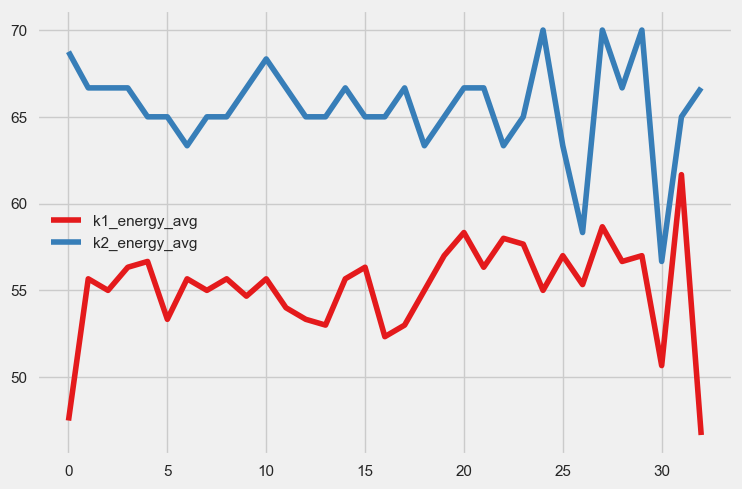

In [72]:

students_df = df.copy()
students_df.sort_values(by=['k1_energy'], inplace=True, ascending=False)

teams = [[] for _ in range(33)]

for team in teams:
    for index, row in students_df.iterrows():
        if row['k1_energy'] >= df['k1_energy'].mean():
            team.append(row)
            students_df.drop(index, inplace=True)
            break

for team in teams:
    while len(team) < 3:
        min_diff = 100000
        min_diff_index = 0
        for index, row in students_df.iterrows():
            k1_energy_avg = (sum(student['k1_energy'] for student in team) + row['k1_energy']) / (len(team) + 1)
            k2_energy_avg = (sum(student['k2_energy'] for student in team) + row['k2_energy']) / (len(team) + 1)
            diff = abs(k1_energy_avg - df['k1_energy'].mean()) + abs(k2_energy_avg - df['k2_energy'].mean())
            if diff < min_diff:
                min_diff = diff
                min_diff_index = index
        team.append(students_df.loc[min_diff_index])
        students_df.drop(min_diff_index, inplace=True)

teams = add_remaining_student(df, students_df, teams)

k1_energy_avg = [sum(student['k1_energy'] for student in team) / len(team) for team in teams]
k2_energy_avg = [sum(student['k2_energy'] for student in team) / len(team) for team in teams]

print("Difference between the min and max k1_energy_avg: ", max(k1_energy_avg) - min(k1_energy_avg))
print("Difference between the min and max k2_energy_avg: ", max(k2_energy_avg) - min(k2_energy_avg))

plt.plot(k1_energy_avg, label="k1_energy_avg")
plt.plot(k2_energy_avg, label="k2_energy_avg")
plt.legend()

# Algorithm 3 Reverse Sort

Difference between the min and max k1_energy_avg:  30.666666666666664
Difference between the min and max k2_energy_avg:  25.0


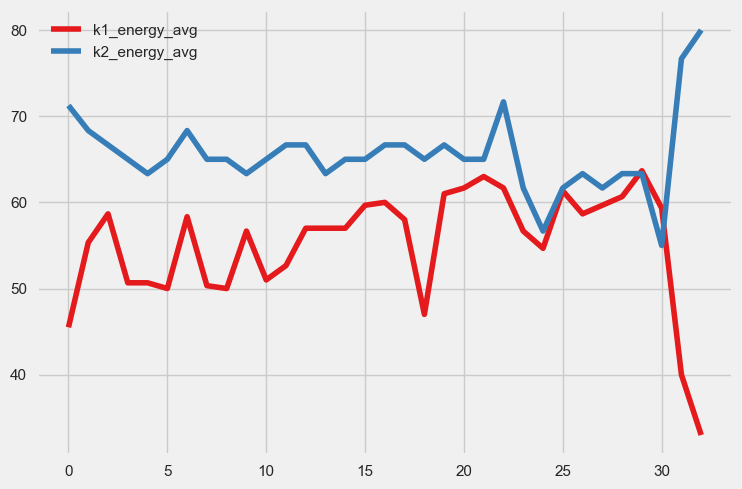

In [70]:

students_df = df.copy()
students_df.sort_values(by=['k1_energy'], inplace=True, ascending=True)

teams = [[] for _ in range(33)]

for team in teams:
    for index, row in students_df.iterrows():
        if row['k1_energy'] >= df['k1_energy'].mean():
            team.append(row)
            students_df.drop(index, inplace=True)
            break

for team in teams:
    while len(team) < 3:
        min_diff = 100000
        min_diff_index = 0
        for index, row in students_df.iterrows():
            k1_energy_avg = (sum(student['k1_energy'] for student in team) + row['k1_energy']) / (len(team) + 1)
            k2_energy_avg = (sum(student['k2_energy'] for student in team) + row['k2_energy']) / (len(team) + 1)
            diff = abs(k1_energy_avg - df['k1_energy'].mean()) + abs(k2_energy_avg - df['k2_energy'].mean())
            if diff < min_diff:
                min_diff = diff
                min_diff_index = index
        team.append(students_df.loc[min_diff_index])
        students_df.drop(min_diff_index, inplace=True)

teams = add_remaining_student(df, students_df, teams)

k1_energy_avg = [sum(student['k1_energy'] for student in team) / len(team) for team in teams]
k2_energy_avg = [sum(student['k2_energy'] for student in team) / len(team) for team in teams]

print("Difference between the min and max k1_energy_avg: ", max(k1_energy_avg) - min(k1_energy_avg))
print("Difference between the min and max k2_energy_avg: ", max(k2_energy_avg) - min(k2_energy_avg))

plt.plot(k1_energy_avg, label="k1_energy_avg")
plt.plot(k2_energy_avg, label="k2_energy_avg")
plt.legend()

Difference between the min and max k1_energy_avg:  27.66666666666667
Difference between the min and max k2_energy_avg:  15.000000000000007


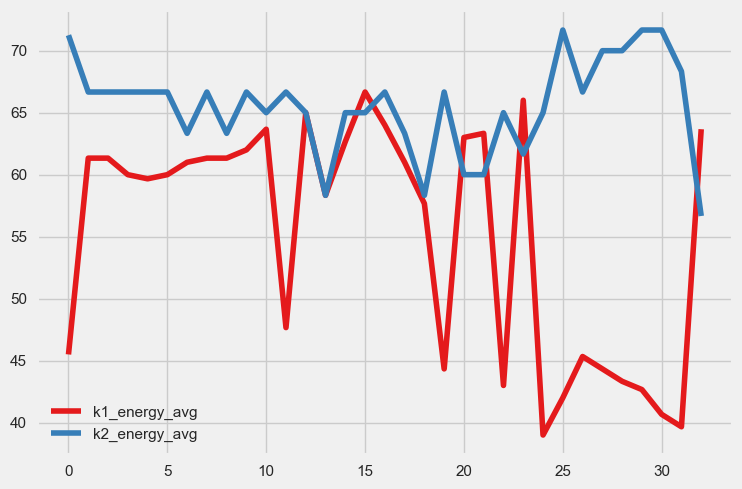

In [71]:

students_df = df.copy()
students_df.sort_values(by=['k1_energy'], inplace=True, ascending=True)

teams = [[] for _ in range(33)]

for team in teams:
    for index, row in students_df.iterrows():
        if row['k1_energy'] >= df['k1_energy'].mean():
            team.append(row)
            students_df.drop(index, inplace=True)
            break

for _ in range(2):
    for team in teams:
        min_diff = 100000
        min_diff_index = 0
        for index, row in students_df.iterrows():
            k1_energy_avg = (sum(student['k1_energy'] for student in team) + row['k1_energy']) / (len(team) + 1)
            k2_energy_avg = (sum(student['k2_energy'] for student in team) + row['k2_energy']) / (len(team) + 1)
            diff = abs(k1_energy_avg - df['k1_energy'].mean()) + abs(k2_energy_avg - df['k2_energy'].mean())
            if diff < min_diff:
                min_diff = diff
                min_diff_index = index
        team.append(students_df.loc[min_diff_index])
        students_df.drop(min_diff_index, inplace=True)

teams = add_remaining_student(df, students_df, teams)

k1_energy_avg = [sum(student['k1_energy'] for student in team) / len(team) for team in teams]
k2_energy_avg = [sum(student['k2_energy'] for student in team) / len(team) for team in teams]

print("Difference between the min and max k1_energy_avg: ", max(k1_energy_avg) - min(k1_energy_avg))
print("Difference between the min and max k2_energy_avg: ", max(k2_energy_avg) - min(k2_energy_avg))

plt.plot(k1_energy_avg, label="k1_energy_avg")
plt.plot(k2_energy_avg, label="k2_energy_avg")
plt.legend()